In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style = 'seaborn')
%matplotlib inline
import random
import numpy as np
import tensorflow as tf
random.seed(42)
# Setting seed
np.random.seed(42)
# TensorFlow seed
tf.random.set_seed(42)

<ipython-input-2-3b70c9c58fe7>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [ ]:
df_reviews_preprocessed = pd.read_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_preprocessed.csv')


One hot encoding of label

In [ ]:
df_reviews_preprocessed['label'] = np.where(df_reviews_preprocessed['label']=='positive',1,0)
df_reviews_preprocessed.head(10)

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language
0,0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,0,en
1,2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,0,en
2,3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,0,en
3,4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,0,en
4,5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,0,en
5,6,4c445b4b34fc8f4ada2ddcd819a05b58,368449,5c7fbb4bcde0a004abe524c4c03d209d,1,not great reads like th grader really well con...,0,en
6,7,6096427ce218e7965671ef46f8fbaa31,10448215,e60d2669f94ca9977a5777ab96cc694c,1,book appeal fans dan brown plot relies main ch...,0,en
7,8,b7d8a8a36da8cbf54aa0dbad66f37dfe,78129,5b88e73a69479f43eb02c432aacc5e54,1,several people know read loved series thought ...,0,en
8,9,7cbe23bcf53f42276f237316ba79b6d7,12257650,7a0abc268fdaec9cebff7811bb13e4e4,1,read one gave made think comic book maybe year...,0,en
9,10,22496af88f94ec2203ce5656ee2852f0,27868408,0af66bd97cfc1f7231f2cb2f8c6b9256,1,book soo slow end not justify means know got g...,0,en


1    95706
0    49945
Name: label, dtype: int64


<Axes: ylabel='label'>

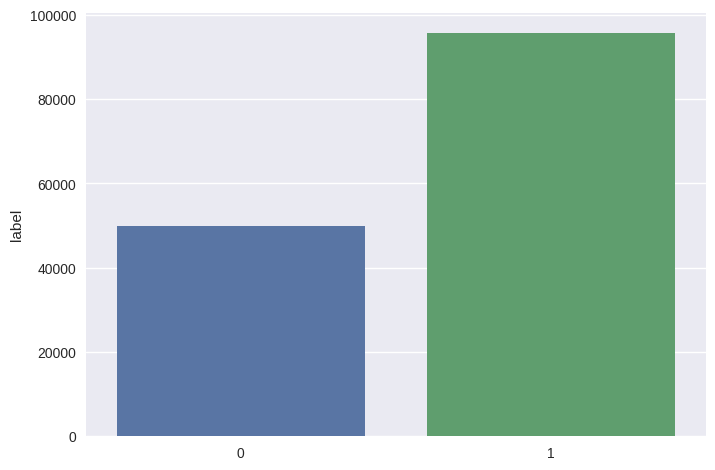

In [ ]:
#balanced dataset? --> positve are double of negative!
import seaborn as sns
x=df_reviews_preprocessed['label'].value_counts()
print(x)

sns.barplot(x=x.index, y=x)

In [ ]:
from sklearn.utils import resample

# Splitting dataset in two according to class label
df_positive = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 1]
df_negative = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 0]

# Undersampling on positive class
df_positive_downsampled = resample(df_positive, replace=False, n_samples=len(df_negative), random_state=42)

# rR building the dataframe
df_reviews_preprocessed = pd.concat([df_negative, df_positive_downsampled])

In [ ]:
# WORD-COUNT on average
df_reviews_preprocessed['word_count'] = df_reviews_preprocessed['review_text'].apply(lambda x: len(str(x).split()))
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count'].mean()) #Positive reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count'].mean()) #Negative reviews

57.464270697767546
51.89870857943738


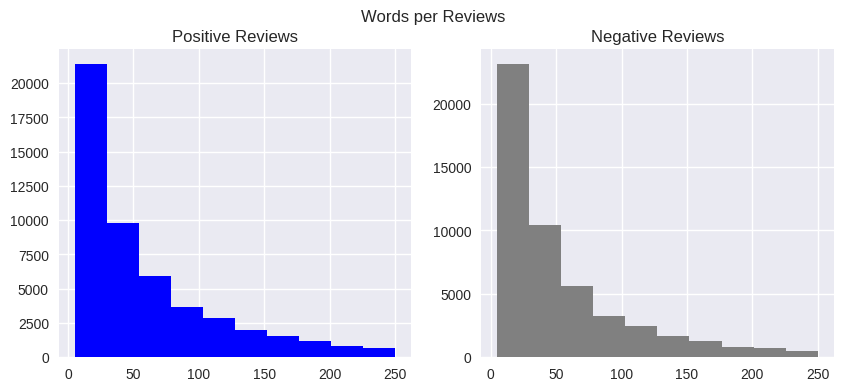

In [ ]:
# PLOTTING WORD-COUNT:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive Reviews')
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count']
ax2.hist(train_words,color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per Reviews')
plt.show()

In [ ]:
df_reviews_preprocessed= df_reviews_preprocessed[df_reviews_preprocessed['word_count']<=250]
df_reviews_preprocessed.shape

(99890, 9)

Shuffle the dataset

In [ ]:
df_reviews_preprocessed = df_reviews_preprocessed.sample(frac=1, random_state=42)
df_reviews_preprocessed.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.reset_index(inplace=True)
df_reviews_preprocessed.head()

,index,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
0,85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
1,80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
2,90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
3,19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
4,144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.drop(columns=['index' , 'Unnamed: 0'],inplace=True) #'Unnamed: 0'
df_reviews_preprocessed.tail()

,user_id,book_id,review_id,rating,review_text,label,language,word_count
99885,6d331c858c1e7688572df30b2dcee0ee,8491980,21bb7b67686f99bb83f6c4c81f258efb,2,rarely read true crime novels reminded althoug...,0,en,54
99886,0a4cee787e44914c038aa6c1a27a0260,22206617,3bbc8c903a38bb3647edd5c493f0d0e8,4,great read another tess monaghan series first ...,1,en,61
99887,c791ede441204ff82b792efb99697922,23482795,fe6abee61381b49bddd6b1c03f3f91dd,5,loved book never read karin slaughter thought ...,1,en,49
99888,4b1948b45023a002fa67e28a378f06bd,17212231,bbedbc85d7ff65bb092156e792b20a78,1,okay classify one worst dan brown far managed ...,0,en,13
99889,83d71654cbd761bb197c33a1c58c3803,17348167,45122f9020dc423fb8975d4740d2ad46,3,fourth novel alexander seaton hero first intro...,0,en,115


Max length per sentence

In [ ]:
max_sentence = max(df_reviews_preprocessed['review_text'], key=len)
words_per_sentence = len(max_sentence.split())
print(f"The max length of a review is {words_per_sentence}")

The max length of a review is 249


# GloVe embedding
Unsupervised learning algo to represent word as dense vector by keeping into account also context. GloVe is a pre trained word vectors model.

Basically uses frequencies of co-occurences rather than related word to context. More information of words. Combinaton of word vector related to probability of co-occurence in that specific corpus.




In [ ]:
# create the function to obtain the corpus
# that is applied to the following chunk

from nltk.tokenize import word_tokenize
import nltk


def create_corpus_tk(df):
    corpus = []
    for text in df['review_text']:
        words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus


In [ ]:
# let's apply the function to our text
import nltk
nltk.download('punkt')

corpus = create_corpus_tk(df_reviews_preprocessed)
#corpus= create_corpus_tk(X_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# how many words have we in our corpus?
num_words= len(corpus)
print(num_words)

99890


In [ ]:
corpus[0]

In [ ]:
#splitting in train e test
# test set is 20% of the entrire set
from sklearn.model_selection import train_test_split
X, y = df_reviews_preprocessed['review_text'], df_reviews_preprocessed['label']
X_train, X_test, y_train, y_test = train_test_split(df_reviews_preprocessed['review_text'],
                                                    df_reviews_preprocessed['label'],
                                                    test_size=0.2, random_state = 45)

In [ ]:
# train sententces
X_train

In [ ]:
# train labels
y_train

65599    0
59892    1
91031    1
55437    0
62810    0
        ..
12895    1
60960    0
6012     0
63107    0
6558     0
Name: label, Length: 79912, dtype: int64

In [ ]:
# let's tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 249

In [ ]:
#let's tokenize using actual words of our vocabulary
# and apply it to our train sentences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# sequences created on sentences
# converted all words to corresponding integer in tokenizer
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences

[[2405,
  246,
  46515,
  7,
  616,
  1890,
  57,
  787,
  57,
  1109,
  1754,
  567,
  31,
  15972,
  183,
  29,
  6138,
  7104,
  56,
  7104,
  56,
  1558,
  18,
  1189,
  36959],
 [428,
  65,
  11,
  1,
  2,
  23,
  1,
  317,
  1900,
  3254,
  45,
  5270,
  483,
  139,
  3064,
  128,
  622,
  811,
  1900,
  4352,
  148,
  1153,
  400,
  20597,
  1427,
  1076,
  104,
  1900,
  3254,
  131,
  5270,
  1137,
  10092,
  1763,
  4943,
  1900,
  889,
  63,
  400,
  535,
  55,
  783,
  589,
  1153,
  6,
  4066,
  5463,
  632,
  117,
  1900,
  242,
  46,
  1153,
  33,
  153,
  400,
  693,
  1900,
  4839,
  1197,
  898,
  255,
  382,
  3,
  145,
  864,
  3254,
  685,
  1,
  168,
  39,
  221,
  12,
  54,
  16,
  267,
  1900,
  20,
  326,
  6,
  949,
  42,
  382,
  400,
  163,
  103,
  26,
  1,
  27,
  107,
  335,
  352,
  153,
  45,
  260,
  12,
  113,
  127,
  221,
  824,
  77,
  560,
  371,
  5909,
  23,
  7549,
  19387,
  206,
  394,
  208,
  64,
  41,
  1348,
  173,
  3369],
 [35, 13, 508,

In [ ]:
# to use keras we need pad of fixed length: each sentence will be in this length
# we use the max length of out reviews, nothing will be truncated
train_padded = pad_sequences (
    train_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
# 0 means that the review is shorter than 249 words
train_padded

array([[ 2405,   246, 46515, ...,     0,     0,     0],
       [  428,    65,    11, ...,     0,     0,     0],
       [   35,    13,   508, ...,     0,     0,     0],
       ...,
       [  427,    14,   277, ...,     0,     0,     0],
       [    1,    50,   109, ...,     0,     0,     0],
       [  307,  1062,  5548, ...,     0,     0,     0]], dtype=int32)

In [ ]:
# let's replicate it on our test sentences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences (
    test_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
test_padded # same length of 249

array([[  35,   28,   39, ...,    0,    0,    0],
       [   1,  221,    2, ...,    0,    0,    0],
       [ 307,    1,  669, ...,    0,    0,    0],
       ...,
       [ 136,    4, 1498, ...,    0,    0,    0],
       [  79, 4425,  163, ...,    0,    0,    0],
       [  36,    5,   22, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(X_train[0]) #real review
print(train_sequences[0]) #padded review

one better mysteries series dandy goes undercover lady maid mrs b alfour hires help escape husband threatened kill turns murdered within days dandy arrival strike newspapers trains transportation coalminers add mix dandy hands full
[2405, 246, 46515, 7, 616, 1890, 57, 787, 57, 1109, 1754, 567, 31, 15972, 183, 29, 6138, 7104, 56, 7104, 56, 1558, 18, 1189, 36959]


In [ ]:
word_index = tokenizer.word_index
print("Number of unique words:",len(word_index))

Number of unique words: 76997


In [ ]:
# dictionary: keys are words found, value are increment numbers
word_index


In [ ]:
word_index['mystery'] #mystery has index 13

13

## Creating Embedding dictionary using GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip


--2024-01-03 14:13:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-03 14:13:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-03 14:13:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='UTF-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vectors = np.asarray(values[1:], 'float32')
      embedding_dict[word] = vectors

f.close()


In [ ]:
#embedding dictionary that adds each vector in the index GloVe pre trained vector
#each word is mapped to a specific vector of 100 dimensions, because we are using this version of GloVe
# the specific word is written between ''
embedding_dict

In [ ]:
# let's create embedded matrix
num_words = len(word_index) +1 #because for loop
embedding_matrix = np.zeros((num_words, 100)) #embedding matrix--> array of zeros

for word, i in word_index.items():
  if i<num_words:
    emb_vec = embedding_dict.get(word) # assing the vector to the actual word in our corpus
    if emb_vec is not None:
      embedding_matrix[i]=emb_vec


In [ ]:
#array of vector, or better: array of the embedded vectors
# position is the specific position of the word in our word_index
embedding_matrix

In [ ]:
# let's check for mystery word
word_index['mystery'] # 13th word

13

In [ ]:
embedding_dict.get('mystery') #correspondant embedded vector

In [ ]:
# let's verify that embedded matrix in position 13 is the embedded vector of mystery
(embedding_matrix[13] == embedding_dict.get('mystery')).all()

# ok it is verified the correspondance

True

Embedding matrix: array in which to specific position correspond to the word in the word_index


In [ ]:
print(train_padded.shape) #items in train set, vectors of length of 249
print(y_train.shape)

print(test_padded.shape) # items in test set
print(y_test.shape)

(79912, 249)
(79912,)
(19978, 249)
(19978,)


**LSTM**



LSTM layers:
LSTMs are particularly well suited for modeling sequential data.Three-layer LSTMs that can capture long-term relationships within text sequences, preserving the sequential structure of reviews.

Epoch 1/50
2498/2498 [==============================] - 128s 48ms/step - loss: 0.6930 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 2/50
2498/2498 [==============================] - 121s 48ms/step - loss: 0.6906 - accuracy: 0.5255 - val_loss: 0.6932 - val_accuracy: 0.5053
Epoch 3/50
2498/2498 [==============================] - 120s 48ms/step - loss: 0.6930 - accuracy: 0.5054 - val_loss: 0.6925 - val_accuracy: 0.5207
Epoch 4/50
2498/2498 [==============================] - 120s 48ms/step - loss: 0.6938 - accuracy: 0.4997 - val_loss: 0.6936 - val_accuracy: 0.5009
Epoch 5/50
2498/2498 [==============================] - 131s 52ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.4991
Epoch 6/50
2498/2498 [==============================] - 131s 52ms/step - loss: 0.6935 - accuracy: 0.4986 - val_loss: 0.6933 - val_accuracy: 0.4991
Epoch 7/50
2498/2498 [==============================] - 123s 49ms/step - loss: 0.6934 - accuracy: 0.4995 - val_loss: 0

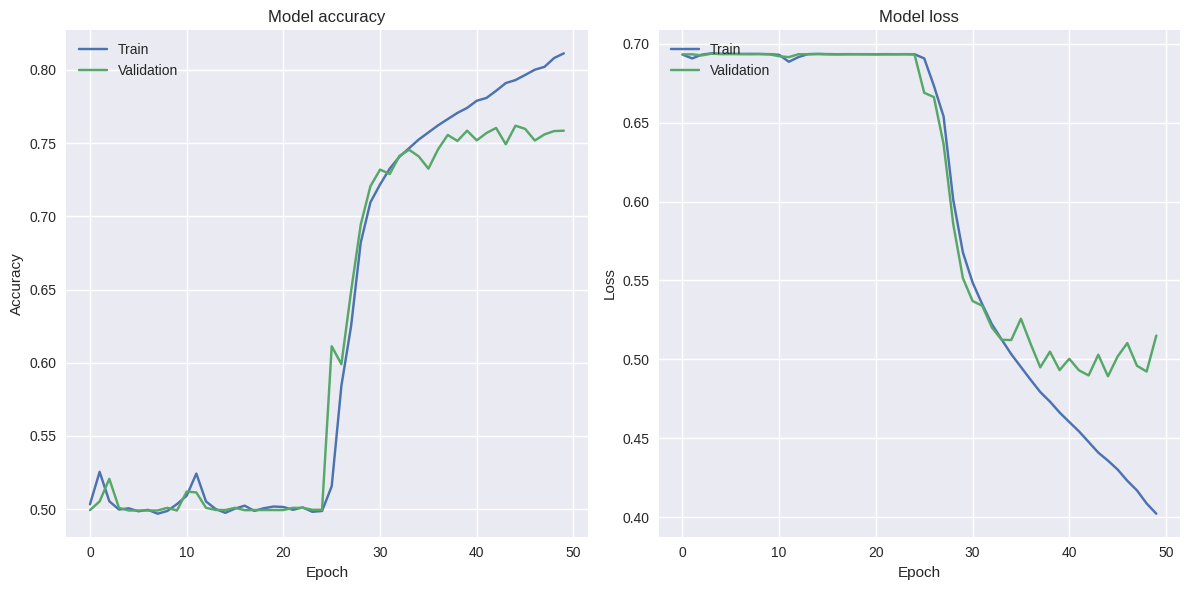

In [ ]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import LSTM

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map
word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')

maxLen = 249

# Modify Tokenizer instantiation to include num_words

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

# Initialize embedding matrix with proper dimensions
emb_matrix = np.zeros((num_words, embed_vector_len))

# Populate embedding matrix with pre-trained word vectors
for word, index in words_to_index.items():
    if index < num_words:
        embedding_vector = word_to_vec_map.get(word)
        if embedding_vector is not None:
            emb_matrix[index] = embedding_vector


# Model definition using Sequential model
model1 = Sequential()
model1.add(Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False))
model1.add(LSTM(256, return_sequences=True))  # Increased units
model1.add(Dropout(0.2))  # Adjusted dropout rate
model1.add(LSTM(256, return_sequences=True))  # Increased units
model1.add(Dropout(0.2))  # Adjusted dropout rate
model1.add(LSTM(256))  # Increased units
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

history = model1.fit(
    X_train_indices,
    y_train,
    epochs=50,  # Train for more epochs
    validation_data=(test_padded, y_test),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Even if the network was trained with a considerable number of layers, it reaches a maximum accuracy of 0.76 and after 43 epochs. Let's try increasing the complexity of the model to see if the results improve.

Epoch 1/30
2498/2498 [==============================] - 241s 94ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.4991
Epoch 2/30
2498/2498 [==============================] - 157s 63ms/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4991
Epoch 3/30
2498/2498 [==============================] - 148s 59ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6929 - val_accuracy: 0.4991
Epoch 4/30
2498/2498 [==============================] - 144s 57ms/step - loss: 0.6935 - accuracy: 0.5119 - val_loss: 0.6818 - val_accuracy: 0.6039
Epoch 5/30
2498/2498 [==============================] - 144s 58ms/step - loss: 0.6915 - accuracy: 0.5198 - val_loss: 0.6909 - val_accuracy: 0.5009
Epoch 6/30
2498/2498 [==============================] - 131s 53ms/step - loss: 0.6922 - accuracy: 0.5023 - val_loss: 0.6899 - val_accuracy: 0.5009
Epoch 7/30
2498/2498 [==============================] - 139s 56ms/step - loss: 0.6923 - accuracy: 0.5059 - val_loss: 0

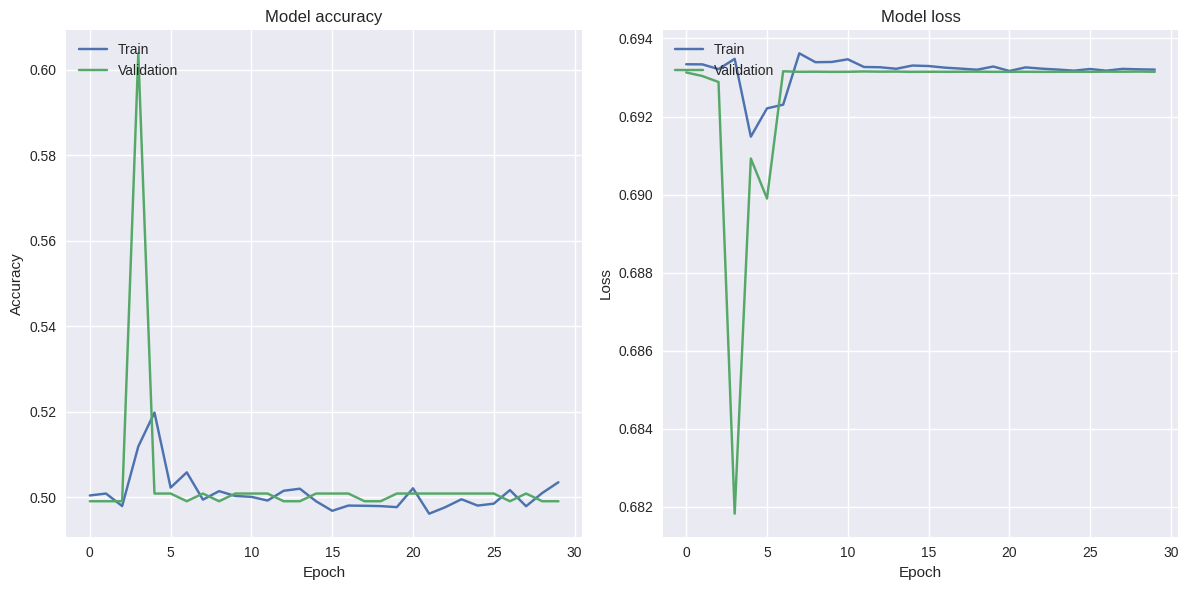

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
import keras
import matplotlib.pyplot as plt


# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

model2 = Sequential()
model2.add(Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=True))

# Adding more LSTM layers
model2.add(LSTM(256, return_sequences=True))
model2.add(Dropout(0.5))

model2.add(LSTM(256, return_sequences=True))
model2.add(Dropout(0.5))

model2.add(LSTM(256))
model2.add(Dropout(0.5))

# Adding more dense layers
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(
    X_train_indices,
    y_train,
    epochs=30,  # more epochs
    validation_data=(test_padded, y_test),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Despite having significantly increased the complexity of the model, we do not notice any significant improvement in the performance of the model (at the thirtieth epoch we still have an accuracy below the baseline), for this reason we are instead decreasing the number of layers

In [ ]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.layers import LSTM


def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map
word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')

maxLen = 249

# Modify Tokenizer instantiation to include num_words

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

# Initialize embedding matrix with proper dimensions
emb_matrix = np.zeros((num_words, embed_vector_len))

# Populate embedding matrix with pre-trained word vectors
for word, index in words_to_index.items():
    if index < num_words:
        embedding_vector = word_to_vec_map.get(word)
        if embedding_vector is not None:
            emb_matrix[index] = embedding_vector


# Model definition using Sequential model
model3 = Sequential()
model3.add(Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False))
model3.add(LSTM(256))  # Just one LSTM layer
model3.add(Dropout(0.2))  # Adjusted dropout rate
model3.add(Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

history = model3.fit(
    X_train_indices,
    y_train,
    epochs=50,  # more epochs
    validation_data=(test_padded, y_test),
    verbose=1
)


Epoch 1/50
2498/2498 [==============================] - 45s 17ms/step - loss: 0.6931 - accuracy: 0.5024 - val_loss: 0.6927 - val_accuracy: 0.5093
Epoch 2/50
2498/2498 [==============================] - 41s 17ms/step - loss: 0.6932 - accuracy: 0.5077 - val_loss: 0.6937 - val_accuracy: 0.4996
Epoch 3/50
2498/2498 [==============================] - 40s 16ms/step - loss: 0.6932 - accuracy: 0.5049 - val_loss: 0.6929 - val_accuracy: 0.5172
Epoch 4/50
2498/2498 [==============================] - 40s 16ms/step - loss: 0.6928 - accuracy: 0.5086 - val_loss: 0.6931 - val_accuracy: 0.4952
Epoch 5/50
2498/2498 [==============================] - 40s 16ms/step - loss: 0.6941 - accuracy: 0.5032 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 6/50
2498/2498 [==============================] - 40s 16ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 7/50
2498/2498 [==============================] - 42s 17ms/step - loss: 0.6930 - accuracy: 0.5004 - val_loss: 0.6931 -

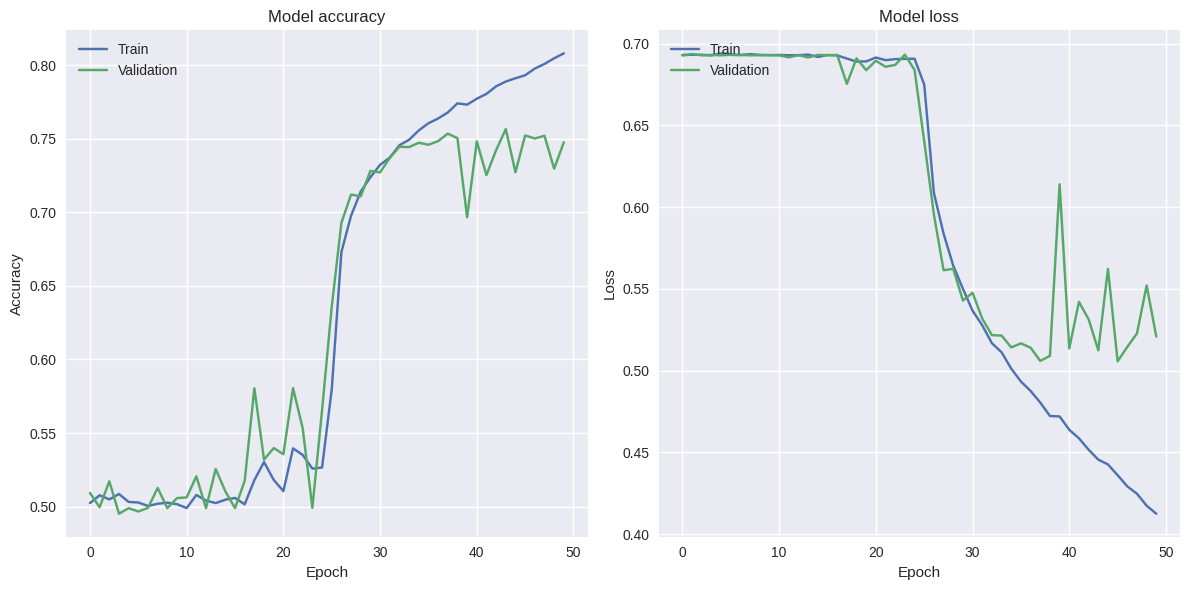

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# predict actual data
sequences = tokenizer.texts_to_sequences(X_test)
padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
pred= model3.predict(padded)
pred_int =pred.round().astype('int')

625/625 [==============================] - 4s 6ms/step


In [ ]:
pred_int.shape

(19978, 1)

In [ ]:
padded[0]

array([   35,    28,    39,   200,    28,    35,   434,   435,   863,
         499,  1108,    23,  1037,  2175,  7691, 12823,    69,   320,
         381,  3735, 12856,  5299,    32,   466,   320,  1073,   345,
          13,  4874,   704,   123,  1008,   278,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
pred # actual predictor

array([[0.27377805],
       [0.04541197],
       [0.98885554],
       ...,
       [0.649892  ],
       [0.10233655],
       [0.70347303]], dtype=float32)

In [ ]:
pred_int

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
#let's build the dataset with actual and predicted label
data1 = {'review_text': list(X_test), 'actual_label': list(y_test), 'predicted_label': list(pred_int)}

# Create a DataFrame
df_resultsLSTM = pd.DataFrame(data1)

In [ ]:
#remove square brakets from predicted column
df_resultsLSTM['predicted_label'] = df_resultsLSTM['predicted_label'].astype(str)
df_resultsLSTM['predicted_label'] = df_resultsLSTM['predicted_label'].str.strip("[]").astype(int)


In [ ]:
df_resultsLSTM.head()

,review_text,actual_label,predicted_label
0,interesting little bit romance little interest...,0,0
1,book slow read killer twist not realize last p...,0,0
2,amazing book agatha christie writing style ama...,0,1
3,bit different style used james patterson good ...,0,1
4,never read anything poe also horror genre exci...,1,1


In [ ]:
# calculating the correct predictions of the model
df_resultsLSTM['correct_prediction'] = df_resultsLSTM['actual_label']-df_resultsLSTM['predicted_label']
df_resultsLSTM['correct_prediction'] = df_resultsLSTM['correct_prediction'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_resultsLSTM.groupby('correct_prediction')['predicted_label'].count()

correct_prediction
corretto      14935
incorretto     5043
Name: predicted_label, dtype: int64

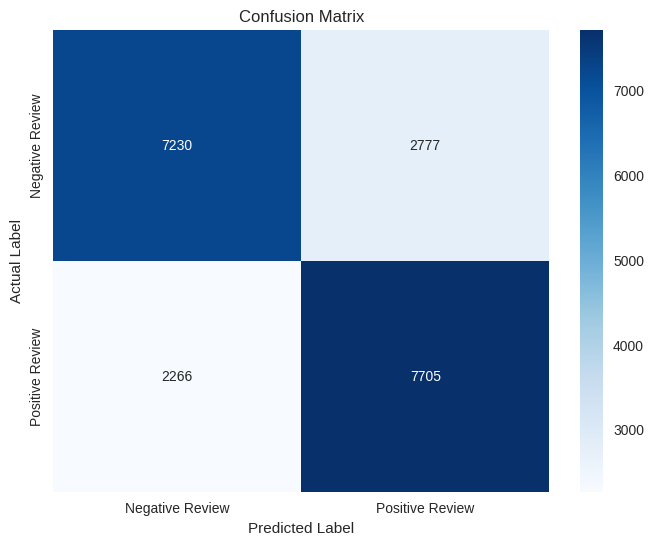

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int)
# Class labels
class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_int))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     10007
           1       0.74      0.77      0.75      9971

    accuracy                           0.75     19978
   macro avg       0.75      0.75      0.75     19978
weighted avg       0.75      0.75      0.75     19978



**Convolutional networks**


Convolutional Layers:
Convolutional networks (Conv1D) are often effective at capturing local patterns in data.
MaxPooling operations progressively reduce the dimensionality of the data, allowing the model to focus on relevant features and reducing the complexity of the model.

Epoch 1/20
2498/2498 [==============================] - 23s 8ms/step - loss: 1.1897 - accuracy: 0.6424 - val_loss: 0.6678 - val_accuracy: 0.6805
Epoch 2/20
2498/2498 [==============================] - 19s 8ms/step - loss: 0.5801 - accuracy: 0.7212 - val_loss: 0.5651 - val_accuracy: 0.7189
Epoch 3/20
2498/2498 [==============================] - 19s 8ms/step - loss: 0.5179 - accuracy: 0.7509 - val_loss: 0.5397 - val_accuracy: 0.7358
Epoch 4/20
2498/2498 [==============================] - 19s 8ms/step - loss: 0.4846 - accuracy: 0.7713 - val_loss: 0.5216 - val_accuracy: 0.7446
Epoch 5/20
2498/2498 [==============================] - 19s 7ms/step - loss: 0.4551 - accuracy: 0.7937 - val_loss: 0.5263 - val_accuracy: 0.7366
Epoch 6/20
2498/2498 [==============================] - 19s 8ms/step - loss: 0.4269 - accuracy: 0.8102 - val_loss: 0.5134 - val_accuracy: 0.7491
Epoch 7/20
2498/2498 [==============================] - 18s 7ms/step - loss: 0.3910 - accuracy: 0.8339 - val_loss: 0.5435 - val_ac

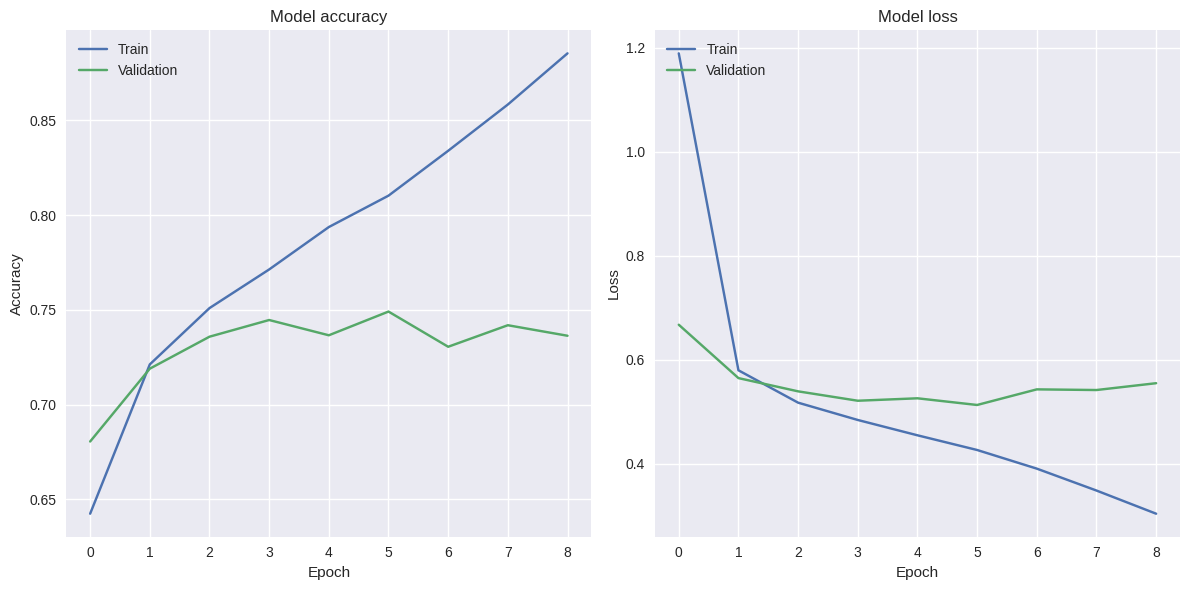

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map
word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')

maxLen = 249
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

# Initialize embedding matrix with proper dimensions
emb_matrix = np.zeros((num_words, embed_vector_len))

# Populate embedding matrix with pre-trained word vectors
for word, index in words_to_index.items():
    if index < num_words:
        embedding_vector = word_to_vec_map.get(word)
        if embedding_vector is not None:
            emb_matrix[index] = embedding_vector


# Model definition using Functional API
input_shape = (maxLen,)  # Assuming maxLen is the length of your sequences
X_indices = Input(input_shape)
embedding_layer = Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False)
embeddings = embedding_layer(X_indices)

X = Conv1D(256, 3, activation='relu')(embeddings)

X = MaxPooling1D(3)(X)

X = Conv1D(256, 3, activation='relu')(X)

X = MaxPooling1D(3)(X)

X = Conv1D(256, 3, activation='relu')(X)

X = Dropout(0.5)(X)
X = MaxPooling1D(3)(X)

X = GlobalMaxPooling1D()(X)

X = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(X)
X = Dropout(0.5)(X)
X = Dense(1, activation='sigmoid')(X)

model_1 = Model(inputs=X_indices, outputs=X)

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

# Model training with callbacks
history = model_1.fit(
    X_train_indices,
    y_train,
    epochs=20,
    validation_data=(test_padded, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


I try to moderate overfitting by reducing the number of nodes in the layers and adding kernel regulizer to the two final dense layers.

Epoch 1/20
2498/2498 [==============================] - 19s 7ms/step - loss: 0.9499 - accuracy: 0.6080 - val_loss: 0.6933 - val_accuracy: 0.6765 - lr: 1.0000e-04
Epoch 2/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.6329 - accuracy: 0.6972 - val_loss: 0.6053 - val_accuracy: 0.7150 - lr: 1.0000e-04
Epoch 3/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5763 - accuracy: 0.7233 - val_loss: 0.5769 - val_accuracy: 0.7228 - lr: 1.0000e-04
Epoch 4/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5448 - accuracy: 0.7411 - val_loss: 0.5608 - val_accuracy: 0.7331 - lr: 1.0000e-04
Epoch 5/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5214 - accuracy: 0.7552 - val_loss: 0.5594 - val_accuracy: 0.7226 - lr: 1.0000e-04
Epoch 6/20
2498/2498 [==============================] - 17s 7ms/step - loss: 0.5052 - accuracy: 0.7651 - val_loss: 0.5389 - val_accuracy: 0.7410 - lr: 1.0000e-04
Epoch 7/20
2498/2498 [======

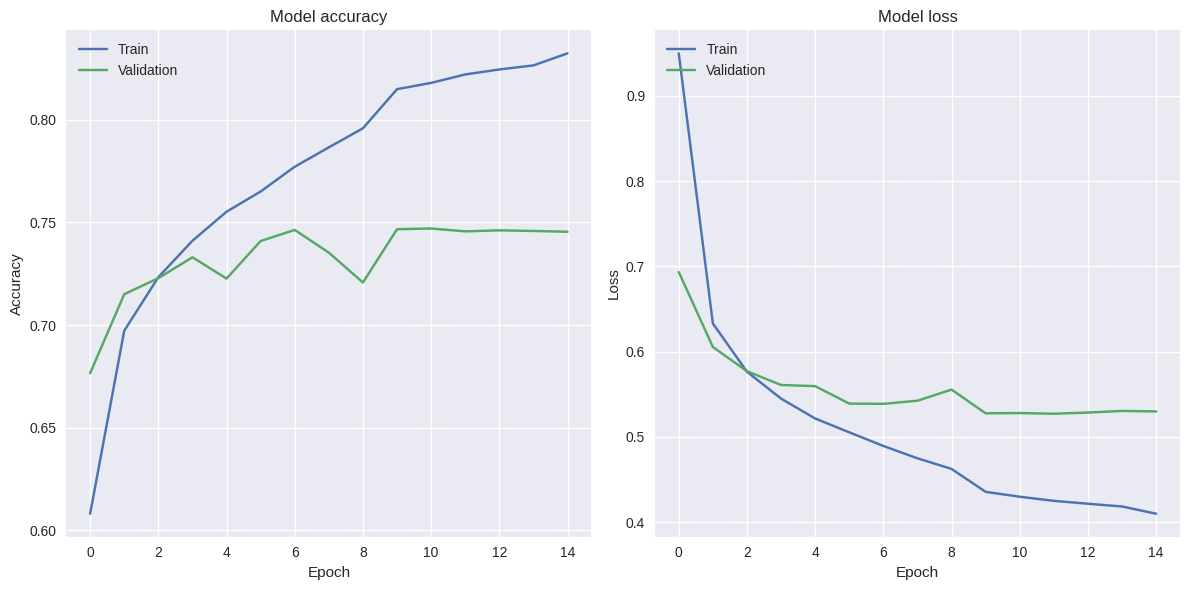

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences


# Definition of function to read the GloVe vector
def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

    return word_to_vec_map

# Reading GloVe vector
word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')



# Model definition using Functional API
input_shape = (maxLen,)  # maxLen is the length of sequences
X_indices = Input(input_shape)
embedding_layer = Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False)
embeddings = embedding_layer(X_indices)

X = Conv1D(128, 3, activation='relu')(embeddings)
X = MaxPooling1D(3)(X)

X = Conv1D(128, 3, activation='relu')(X)
X = MaxPooling1D(3)(X)

X = Conv1D(128, 3, activation='relu')(X)
X = Dropout(0.5)(X)
X = MaxPooling1D(3)(X)

X = GlobalMaxPooling1D()(X)

X = Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(X)
X = Dropout(0.5)(X)
X = Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01))(X)

model_2 = Model(inputs=X_indices, outputs=X)

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

# Model training with callbacks
history = model_2.fit(
    X_train_indices,
    y_train,
    epochs=20,
    validation_data=(test_padded, y_test),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Removing callback dynamic learning rate and the kernel regulizers.

Epoch 1/20
2498/2498 [==============================] - 19s 7ms/step - loss: 0.6532 - accuracy: 0.6107 - val_loss: 0.6083 - val_accuracy: 0.6824
Epoch 2/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5861 - accuracy: 0.6939 - val_loss: 0.5726 - val_accuracy: 0.7123
Epoch 3/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5508 - accuracy: 0.7219 - val_loss: 0.5512 - val_accuracy: 0.7262
Epoch 4/20
2498/2498 [==============================] - 15s 6ms/step - loss: 0.5246 - accuracy: 0.7401 - val_loss: 0.5380 - val_accuracy: 0.7317
Epoch 5/20
2498/2498 [==============================] - 17s 7ms/step - loss: 0.5049 - accuracy: 0.7535 - val_loss: 0.5455 - val_accuracy: 0.7169
Epoch 6/20
2498/2498 [==============================] - 16s 7ms/step - loss: 0.4856 - accuracy: 0.7661 - val_loss: 0.5204 - val_accuracy: 0.7389
Epoch 7/20
2498/2498 [==============================] - 15s 6ms/step - loss: 0.4687 - accuracy: 0.7758 - val_loss: 0.5189 - val_ac

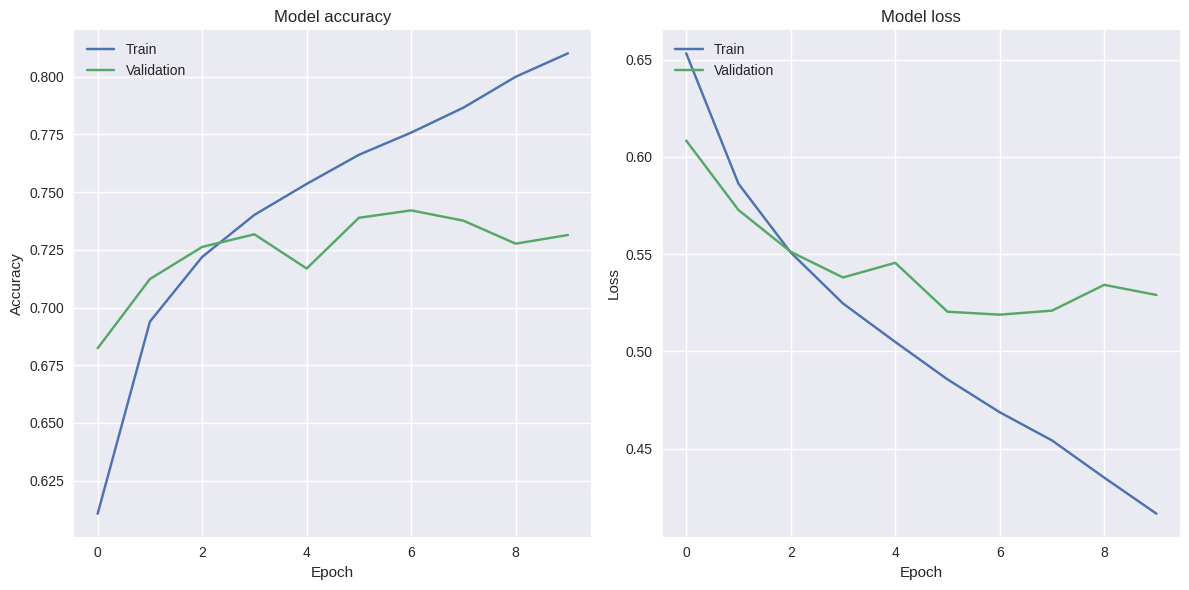

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences



def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

    return word_to_vec_map


word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')



# Model definition using Functional API
input_shape = (maxLen,)
X_indices = Input(input_shape)
embedding_layer = Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False)
embeddings = embedding_layer(X_indices)

X = Conv1D(128, 3, activation='relu')(embeddings)
X = MaxPooling1D(3)(X)

X = Conv1D(128, 3, activation='relu')(X)
X = MaxPooling1D(3)(X)

X = Conv1D(128, 3, activation='relu')(X)
X = Dropout(0.5)(X)
X = MaxPooling1D(3)(X)

X = GlobalMaxPooling1D()(X)

X = Dense(64, activation='relu')(X)
X = Dropout(0.5)(X)
X = Dense(1, activation='sigmoid')(X)

model_3 = Model(inputs=X_indices, outputs=X)

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

# Model training with callbacks
history = model_3.fit(
    X_train_indices,
    y_train,
    epochs=20,
    validation_data=(test_padded, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Adding two kernel regulizers just to the first two layers (the most importnant ones) of the neural network

Epoch 1/20
2498/2498 [==============================] - 19s 7ms/step - loss: 1.6106 - accuracy: 0.6076 - val_loss: 0.9064 - val_accuracy: 0.6526
Epoch 2/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.7488 - accuracy: 0.7023 - val_loss: 0.6730 - val_accuracy: 0.7171
Epoch 3/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.6299 - accuracy: 0.7291 - val_loss: 0.6383 - val_accuracy: 0.7047
Epoch 4/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5862 - accuracy: 0.7434 - val_loss: 0.5975 - val_accuracy: 0.7348
Epoch 5/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5603 - accuracy: 0.7552 - val_loss: 0.5877 - val_accuracy: 0.7328
Epoch 6/20
2498/2498 [==============================] - 16s 6ms/step - loss: 0.5439 - accuracy: 0.7637 - val_loss: 0.5722 - val_accuracy: 0.7474
Epoch 7/20
2498/2498 [==============================] - 16s 7ms/step - loss: 0.5297 - accuracy: 0.7724 - val_loss: 0.5682 - val_ac

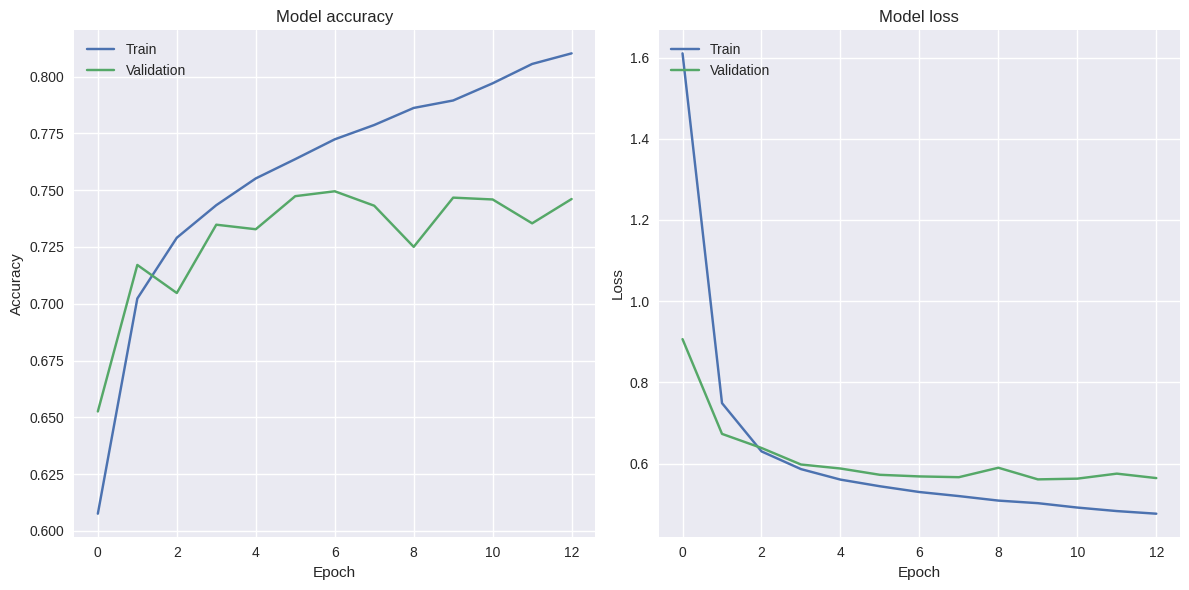

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Embedding
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2



def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

    return word_to_vec_map

# Lettura del vettore GloVe
word_to_vec_map = read_glove_vector('/content/glove.6B.100d.txt')



# Model definition using Functional API
input_shape = (maxLen,)
X_indices = Input(input_shape)
embedding_layer = Embedding(input_dim=num_words, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False)
embeddings = embedding_layer(X_indices)

# First Conv1D layer with L2 regularisation
X = Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.01))(embeddings)
X = MaxPooling1D(3)(X)

# Second Conv1D layer with L2 regularisation
X = Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.01))(X)
X = MaxPooling1D(3)(X)

# Third Conv1D layer with L2 regularisation
X = Conv1D(128, 3, activation='relu')(X)
X = Dropout(0.5)(X)
X = MaxPooling1D(3)(X)

X = GlobalMaxPooling1D()(X)

# First Dense layer with L2 regularisation
X = Dense(64, activation='relu')(X)
X = Dropout(0.5)(X)

# Second Dense layer with L2 regularisation
X = Dense(1, activation='sigmoid')(X)

model_4 = Model(inputs=X_indices, outputs=X)

# Compile the model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model_4.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Tokenize and pad the input data
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

# Model training with callbacks
history = model_4.fit(
    X_train_indices,
    y_train,
    epochs=20,
    validation_data=(test_padded, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# predict actual data
sequences = tokenizer.texts_to_sequences(X_test)
padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
pred= model_1.predict(padded)
pred_int_conv1 =pred.round().astype('int')

625/625 [==============================] - 1s 2ms/step


In [ ]:
pred_int_conv1.shape

(19978, 1)

In [ ]:
#predicting on the padded and transfrom to integer
pred= model_2.predict(padded)
pred_int_conv2 =pred.round().astype('int')

625/625 [==============================] - 1s 2ms/step


In [ ]:
#predicting on the padded and transfrom to integer
pred= model_3.predict(padded)
pred_int_conv3 =pred.round().astype('int')

625/625 [==============================] - 2s 3ms/step


In [ ]:
#predicting on the padded and transfrom to integer
pred= model_4.predict(padded)
pred_int_conv4 =pred.round().astype('int')

625/625 [==============================] - 2s 4ms/step


In [ ]:
#let's build the dataset with actual and predicted label
data = {'review_text': list(X_test), 'actual_label': list(y_test), 'predicted_label_conv1': list(pred_int_conv1), 'predicted_label_conv2': list(pred_int_conv2), 'predicted_label_conv3': list(pred_int_conv3), 'predicted_label_conv4': list(pred_int_conv4)}

# Create a DataFrame
df_results = pd.DataFrame(data)


In [ ]:
#remove square brakets from predicted column
df_results['predicted_label_conv1'] = df_results['predicted_label_conv1'].astype(str)
df_results['predicted_label_conv1'] = df_results['predicted_label_conv1'].str.strip("[]").astype(int)
#remove square brakets from predicted column
df_results['predicted_label_conv2'] = df_results['predicted_label_conv2'].astype(str)
df_results['predicted_label_conv2'] = df_results['predicted_label_conv2'].str.strip("[]").astype(int)
#remove square brakets from predicted column
df_results['predicted_label_conv3'] = df_results['predicted_label_conv3'].astype(str)
df_results['predicted_label_conv3'] = df_results['predicted_label_conv3'].str.strip("[]").astype(int)
#remove square brakets from predicted column
df_results['predicted_label_conv4'] = df_results['predicted_label_conv4'].astype(str)
df_results['predicted_label_conv4'] = df_results['predicted_label_conv4'].str.strip("[]").astype(int)


In [ ]:
# calculating the correct predictions of the model
df_results['correct_prediction_conv1'] = df_results['actual_label']-df_results['predicted_label_conv1']
# calculating the correct predictions of the model
df_results['correct_prediction_conv2'] = df_results['actual_label']-df_results['predicted_label_conv2']
# calculating the correct predictions of the model
df_results['correct_prediction_conv3'] = df_results['actual_label']-df_results['predicted_label_conv3']
# calculating the correct predictions of the model
df_results['correct_prediction_conv4'] = df_results['actual_label']-df_results['predicted_label_conv4']

In [ ]:
df_results.head()

,review_text,actual_label,predicted_label_conv1,predicted_label_conv2,predicted_label_conv3,predicted_label_conv4,correct_prediction_conv1,correct_prediction_conv2,correct_prediction_conv3,correct_prediction_conv4
0,interesting little bit romance little interest...,0,0,0,0,0,0,0,0,0
1,book slow read killer twist not realize last p...,0,0,0,0,0,0,0,0,0
2,amazing book agatha christie writing style ama...,0,1,1,1,1,-1,-1,-1,-1
3,bit different style used james patterson good ...,0,1,1,1,1,-1,-1,-1,-1
4,never read anything poe also horror genre exci...,1,1,1,1,1,0,0,0,0


In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_conv1'] = df_results['correct_prediction_conv1'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results.groupby('correct_prediction_conv1')['predicted_label_conv1'].count()

correct_prediction_conv1
corretto      14965
incorretto     5013
Name: predicted_label_conv1, dtype: int64

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_conv2'] = df_results['correct_prediction_conv2'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results.groupby('correct_prediction_conv2')['predicted_label_conv2'].count()

correct_prediction_conv2
corretto      14897
incorretto     5081
Name: predicted_label_conv2, dtype: int64

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_conv3'] = df_results['correct_prediction_conv3'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results.groupby('correct_prediction_conv3')['predicted_label_conv3'].count()

correct_prediction_conv3
corretto      14825
incorretto     5153
Name: predicted_label_conv3, dtype: int64

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_conv4'] = df_results['correct_prediction_conv4'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results.groupby('correct_prediction_conv4')['predicted_label_conv4'].count()

correct_prediction_conv4
corretto      14918
incorretto     5060
Name: predicted_label_conv4, dtype: int64

In [ ]:
df_results.head()

,review_text,actual_label,predicted_label_conv1,predicted_label_conv2,predicted_label_conv3,predicted_label_conv4,correct_prediction_conv1,correct_prediction_conv2,correct_prediction_conv3,correct_prediction_conv4
0,interesting little bit romance little interest...,0,0,0,0,0,corretto,corretto,corretto,corretto
1,book slow read killer twist not realize last p...,0,0,0,0,0,corretto,corretto,corretto,corretto
2,amazing book agatha christie writing style ama...,0,1,1,1,1,incorretto,incorretto,incorretto,incorretto
3,bit different style used james patterson good ...,0,1,1,1,1,incorretto,incorretto,incorretto,incorretto
4,never read anything poe also horror genre exci...,1,1,1,1,1,corretto,corretto,corretto,corretto


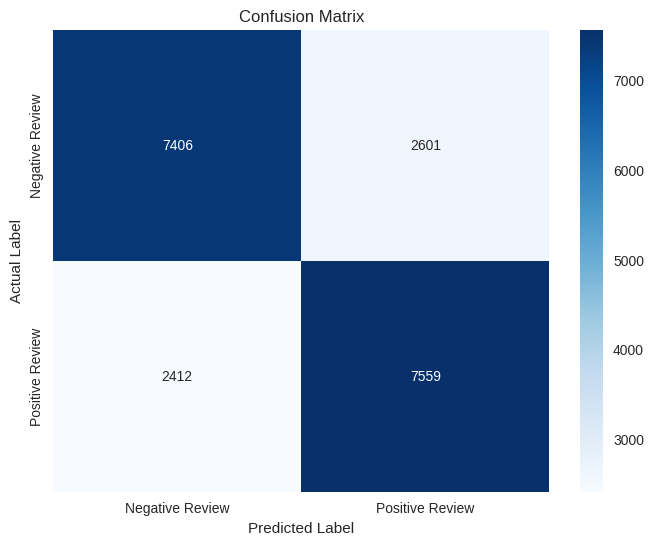

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_conv1)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


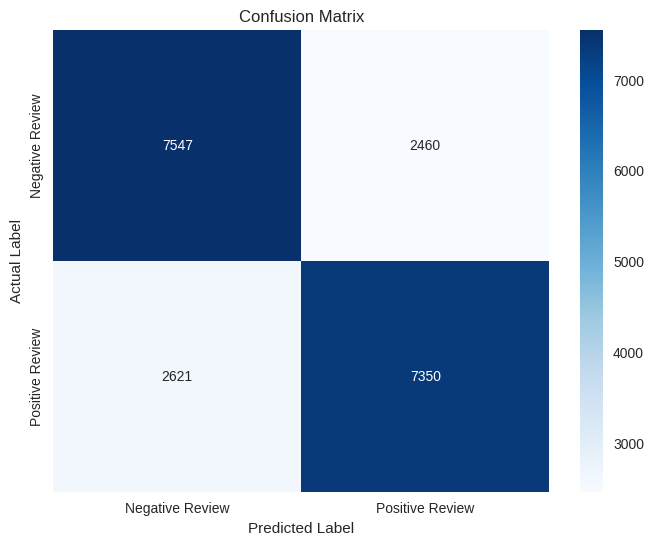

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_conv2)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

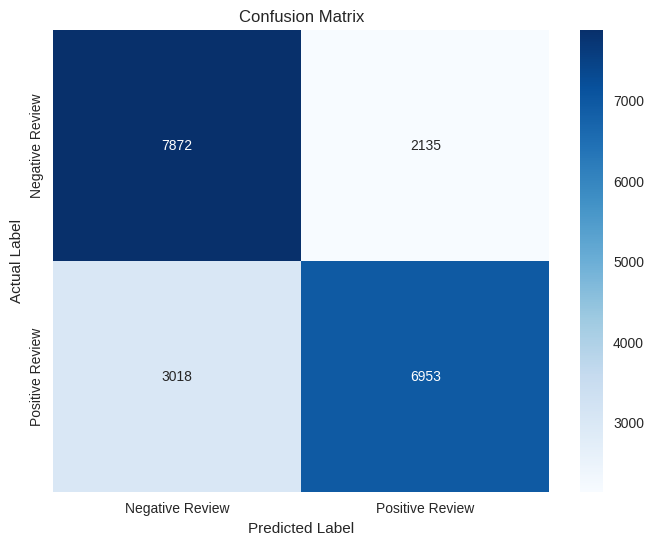

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_conv3)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

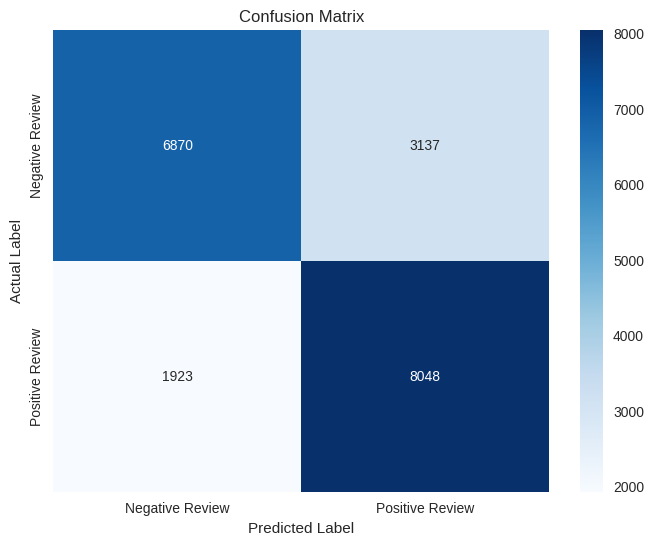

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_conv4)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

**Final Comparisons**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred_int_conv1))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     10007
           1       0.74      0.76      0.75      9971

    accuracy                           0.75     19978
   macro avg       0.75      0.75      0.75     19978
weighted avg       0.75      0.75      0.75     19978



In [ ]:
print(classification_report(y_test, pred_int_conv2))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     10007
           1       0.75      0.74      0.74      9971

    accuracy                           0.75     19978
   macro avg       0.75      0.75      0.75     19978
weighted avg       0.75      0.75      0.75     19978



In [ ]:
print(classification_report(y_test, pred_int_conv3))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10007
           1       0.77      0.70      0.73      9971

    accuracy                           0.74     19978
   macro avg       0.74      0.74      0.74     19978
weighted avg       0.74      0.74      0.74     19978



In [ ]:
print(classification_report(y_test, pred_int_conv4))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73     10007
           1       0.72      0.81      0.76      9971

    accuracy                           0.75     19978
   macro avg       0.75      0.75      0.75     19978
weighted avg       0.75      0.75      0.75     19978

